In [1]:
# Importing required Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Read data
train=pd.read_csv("loan.csv")

In [6]:
# Features in the dataset
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Applicant_Income', 'Coapplicant_Income',
       'Loan_Amount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status'],
      dtype='object')

In [7]:
# Print data types for each variable
train.dtypes

Loan_ID                object
Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
Applicant_Income        int64
Coapplicant_Income    float64
Loan_Amount           float64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area          object
Loan_Status            object
dtype: object

In [8]:
# Shape of the dataset
train.shape

(614, 13)

In [95]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


## Univariate Analysis

In [96]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [97]:
# Normalize can be set to True to print proportions instead of number 
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

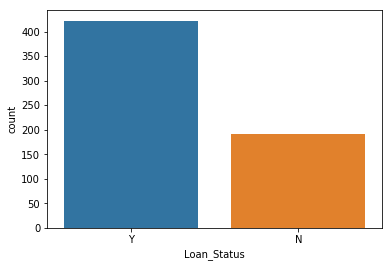

In [98]:
# Bar graph for load_status
sns.countplot(x="Loan_Status", data=train)

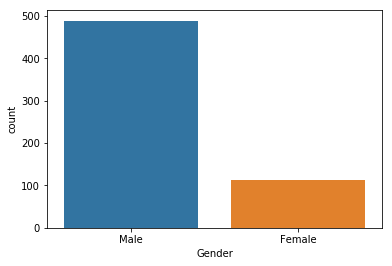

In [99]:
# Bar Graph for Gender
sns.countplot(x="Gender",data=train)

In [12]:
train.pivot_table(index="Loan_Status",columns="Gender",values="Loan_ID", aggfunc="count")

Gender,Female,Male
Loan_Status,,
N,37,150
Y,75,339


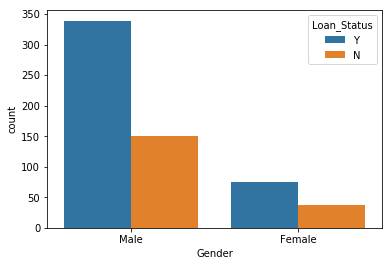

In [9]:
# Bar Graph for Gender
sns.countplot(x="Gender", hue="Loan_Status", data=train)

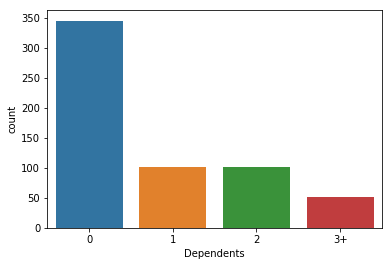

In [13]:
# Bar graph for dependents 
# train['Dependents'].value_counts(normalize=True).plot.bar(title= 'Dependents')
sns.countplot(x="Dependents", data=train)

In [17]:
train['Dependents'].value_counts(normalize=True)

0     0.575960
1     0.170284
2     0.168614
3+    0.085142
Name: Dependents, dtype: float64

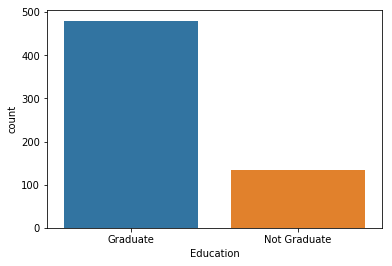

In [18]:
sns.countplot("Education", data =train)

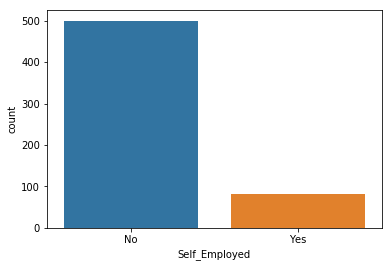

In [19]:
# Bar graph of Self_Employed
sns.countplot("Self_Employed",data=train)

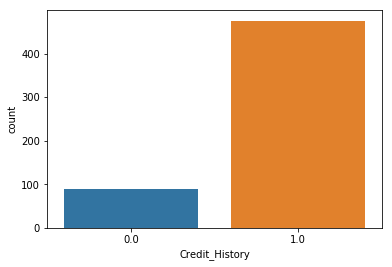

In [20]:
# Bar graph of Credit_History
sns.countplot(x='Credit_History',data=train)

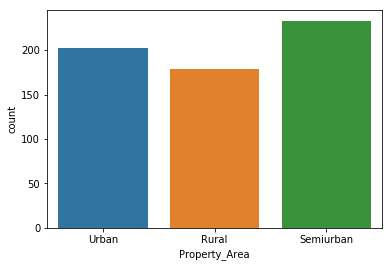

In [21]:
# Bar graph of Property_Area
sns.countplot(x='Property_Area',data=train)

## Continous variables 

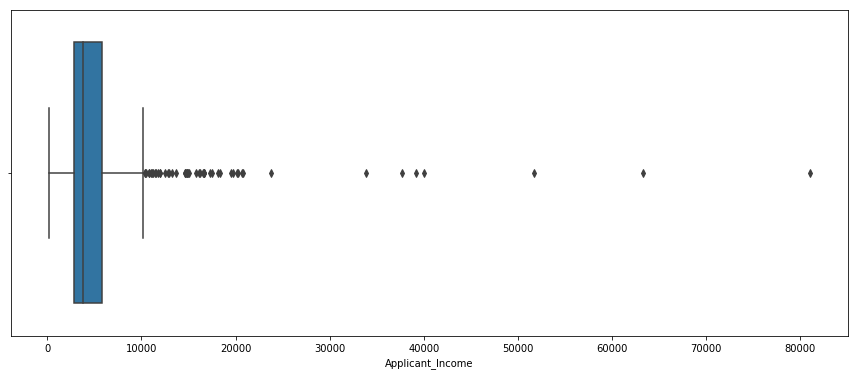

In [26]:
# Visualizing numerical features
fig,ax = plt.subplots( figsize=(15,6))
sns.boxplot(x="Applicant_Income",data=train, ax= ax)

d:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


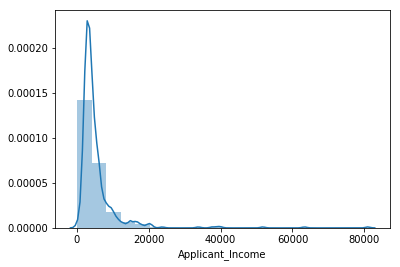

In [27]:
sns.distplot(train["Applicant_Income"], bins=20) 

Text(0.5, 0.98, '')

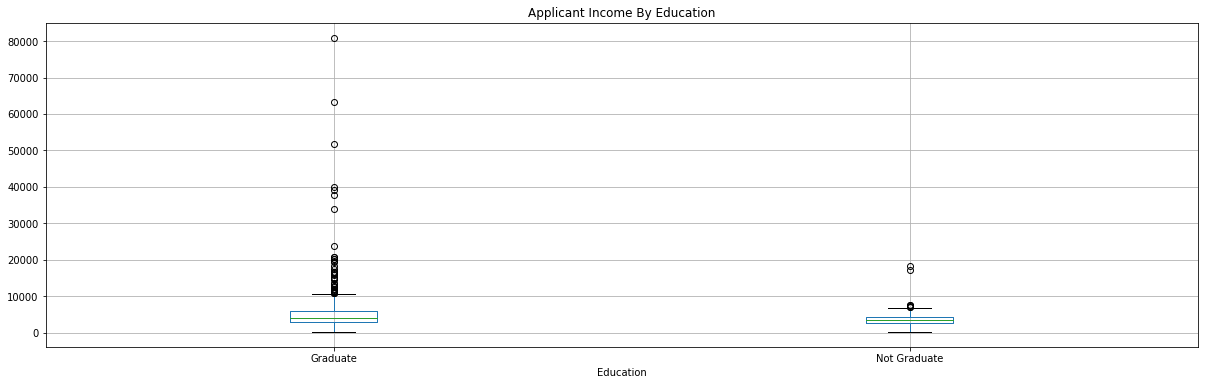

In [28]:
train.boxplot(column='Applicant_Income', by = 'Education', figsize=(20,6))
plt.title("Applicant Income By Education")
plt.suptitle("")  # Suppress default title

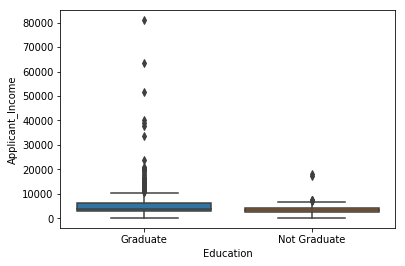

In [29]:
sns.boxplot(x="Education",y="Applicant_Income",data=train)

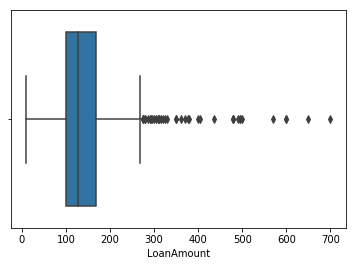

In [109]:
sns.boxplot(train["LoanAmount"])

## Bivariate Analysis

  Loan_Status  Gender Married  Count
0           N  Female      No     29
1           N  Female     Yes      8
2           N    Male      No     49
3           N    Male     Yes    101
4           Y  Female      No     51
5           Y  Female     Yes     23
6           Y    Male      No     81
7           Y    Male     Yes    256


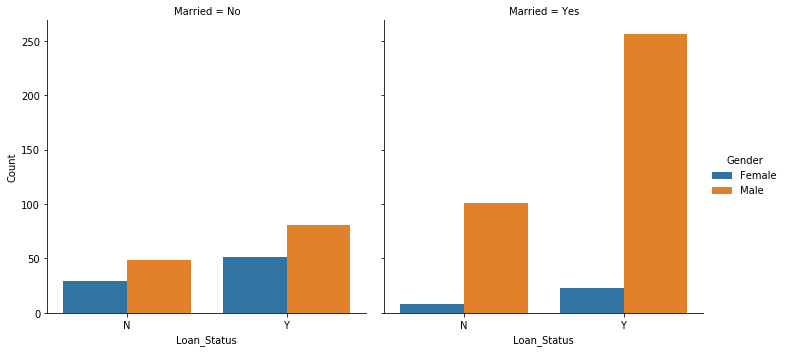

In [110]:
d = train.groupby(by=["Loan_Status","Gender","Married"], as_index=False)['Loan_ID'].count()
d.rename(columns={'Loan_ID':'Count'}, inplace=True)
print(d)
sns.catplot(x="Loan_Status",y="Count", hue="Gender",col="Married", data=d, kind="bar")

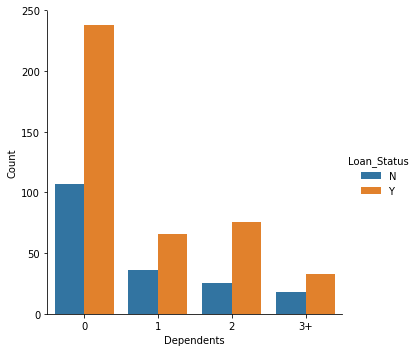

In [111]:
d = train.groupby(by=["Loan_Status","Dependents"], as_index=False)['Loan_ID'].count()
d.rename(columns={'Loan_ID':'Count'}, inplace=True)
sns.catplot(x="Dependents",y="Count", hue="Loan_Status", data=d, kind="bar")

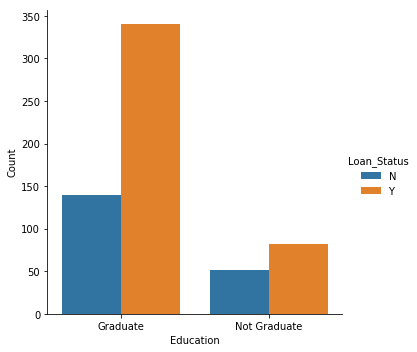

In [112]:
d = train.groupby(by=["Loan_Status","Education"], as_index=False)['Loan_ID'].count()
d.rename(columns={'Loan_ID':'Count'}, inplace=True)
sns.catplot(x="Education",y="Count", hue="Loan_Status", data=d, kind="bar")

  Loan_Status Self_Employed  Count
0           N            No    157
1           N           Yes     26
2           Y            No    343
3           Y           Yes     56


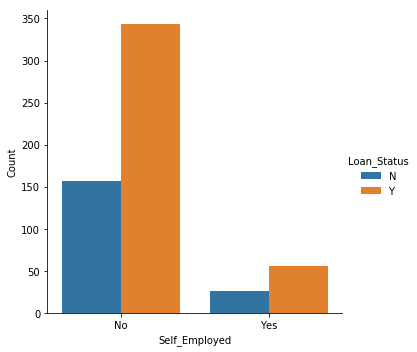

In [113]:
d = train.groupby(by=["Loan_Status","Self_Employed"], as_index=False)['Loan_ID'].count()
d.rename(columns={'Loan_ID':'Count'}, inplace=True)
print(d)
sns.catplot(x="Self_Employed",y="Count", hue="Loan_Status", data=d, kind="bar")

  Loan_Status  Credit_History  Count
0           N             0.0     82
1           N             1.0     97
2           Y             0.0      7
3           Y             1.0    378


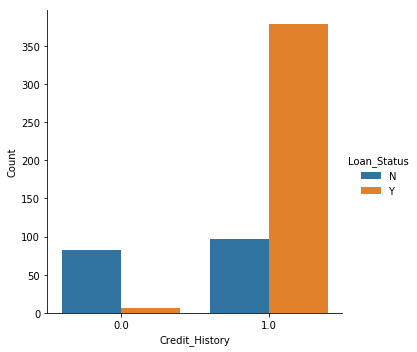

In [114]:
d = train.groupby(by=["Loan_Status","Credit_History"], as_index=False)['Loan_ID'].count()
d.rename(columns={'Loan_ID':'Count'}, inplace=True)
print(d)
sns.catplot(x="Credit_History",y="Count", hue="Loan_Status", data=d, kind="bar")

  Loan_Status Property_Area  Count
0           N         Rural     69
1           N     Semiurban     54
2           N         Urban     69
3           Y         Rural    110
4           Y     Semiurban    179
5           Y         Urban    133


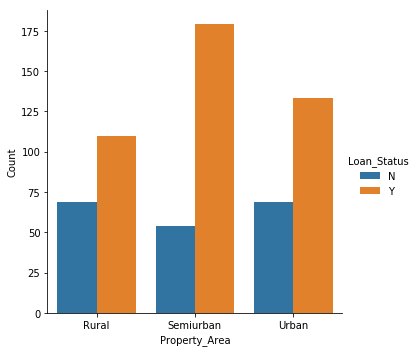

In [115]:
d = train.groupby(by=["Loan_Status","Property_Area"], as_index=False)['Loan_ID'].count()
d.rename(columns={'Loan_ID':'Count'}, inplace=True)
print(d)
sns.catplot(x="Property_Area",y="Count", hue="Loan_Status", data=d, kind="bar")

In [116]:
# Making bins for Applicant income variable
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train['Income_Bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)

In [117]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
Income_Bin           614 non-null category
dtypes: category(1), float64(4), int64(1), object(8)
memory usage: 63.2+ KB


  Loan_Status Income_Bin  Count
0           N        Low     34
1           N    Average     67
2           N       High     45
3           N  Very high     46
4           Y        Low     74
5           Y    Average    159
6           Y       High     98
7           Y  Very high     91


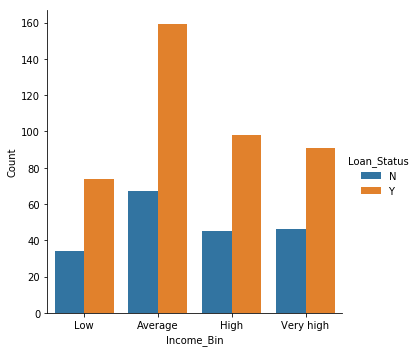

In [118]:
d = train.groupby(by=["Loan_Status","Income_Bin"], as_index=False)['Loan_ID'].count()
d.rename(columns={'Loan_ID':'Count'}, inplace=True)
print(d)
sns.catplot(x="Income_Bin",y="Count", hue="Loan_Status", data=d, kind="bar")

In [119]:
# Making bins for Coapplicant income variable
bins=[0,1000,3000,42000]
group=['Low','Average','High']
train['Coapplicant_Income_Bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)

  Loan_Status Coapplicant_Income_Bin  Count
0           N                    Low      3
1           N                Average     61
2           N                   High     32
3           Y                    Low     19
4           Y                Average    161
5           Y                   High     65


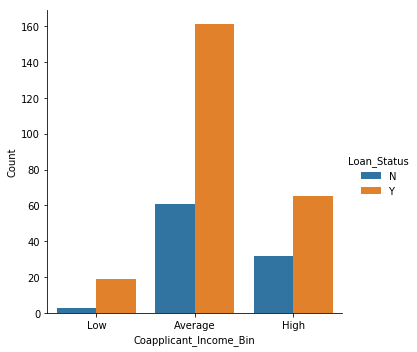

In [120]:
d = train.groupby(by=["Loan_Status","Coapplicant_Income_Bin"], as_index=False)['Loan_ID'].count()
d.rename(columns={'Loan_ID':'Count'}, inplace=True)
print(d)
sns.catplot(x="Coapplicant_Income_Bin",y="Count", hue="Loan_Status", data=d, kind="bar")

In [121]:
# Making bins for LoanAmount variable
bins=[0,100,200,700]
group=['Low','Average','High']
train['LoanAmount_Bin']=pd.cut(train['LoanAmount'],bins,labels=group)

  Loan_Status LoanAmount_Bin  Count
0           N            Low     47
1           N        Average    103
2           N           High     31
3           Y            Low    107
4           Y        Average    255
5           Y           High     49


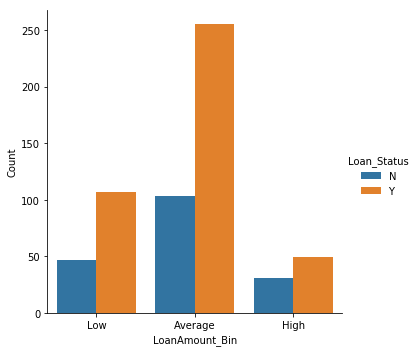

In [122]:
d = train.groupby(by=["Loan_Status","LoanAmount_Bin"], as_index=False)['Loan_ID'].count()
d.rename(columns={'Loan_ID':'Count'}, inplace=True)
print(d)
sns.catplot(x="LoanAmount_Bin",y="Count", hue="Loan_Status", data=d, kind="bar")

In [123]:
# Drop the new variable of bins
train=train.drop(['Income_Bin', 'Coapplicant_Income_Bin', 'LoanAmount_Bin'], axis=1)

In [124]:
# Convert Dependents to str 
train['Dependents'] = train["Dependents"].astype('str')

In [125]:
# replacing 3+ in Dependents variable with 3
train['Dependents'].replace(to_replace = ['0', '1', '2', '3+'], value=['0', '1','2', '3'],inplace=True)

In [126]:
# replacing Y and N in Loan_Status variable with 1 and 0 respectively
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

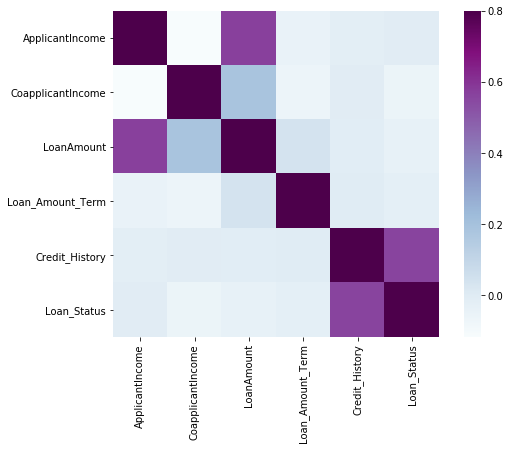

In [127]:
# Print correlation matrix to understand relationship between variables
matrix = train.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

### Missing value and outlier treatment

In [128]:
# Checking the missing values
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [129]:
# replacing the missing values with the mode
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [130]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [131]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [132]:
# Replacing the missing value in LoanAmount based on the values of Self_Employed and Education Variable
table = train.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)

# Define function to return value of this pivot_table
def fage(x):
 return table.loc[x['Self_Employed'],x['Education']]

# Replace missing values
train['LoanAmount'].fillna(train[train['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

In [133]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

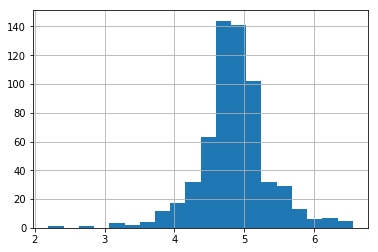

In [134]:
# Removing skewness in LoanAmount variable by log transformation
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)

In [135]:
train=train.drop('Loan_ID',axis=1)

In [136]:
y = train.Loan_Status
train = train.drop('Loan_Status',axis=1)

In [137]:
# Adding dummies to the dataset
train=pd.get_dummies(train)

In [138]:
train.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'LoanAmount_log', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_0',
       'Dependents_1', 'Dependents_2', 'Dependents_3', 'Dependents_nan',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [139]:
train.shape

(614, 22)

## Build Model using Logistic Regression

In [182]:
# Importing packages for cross validation and logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

### Split data into train and test data 

In [141]:
X_train, X_test, y_train, y_test = train_test_split(train,y)

In [186]:
# logistic regression   
model = LogisticRegression(random_state=1)
model.fit(X_train,y_train)
# Display score
print( model.score(X_test, y_test))

0.7792207792207793


In [187]:
model.coef_

array([[ 1.26597629e-05, -5.72931197e-05, -6.65091149e-04,
        -3.52780011e-04,  2.73481406e+00, -1.87285475e-01,
        -4.31664369e-02, -3.67052541e-02, -3.03612109e-01,
         2.23740418e-01,  4.31831628e-02, -2.63253364e-01,
         2.34100956e-01, -7.29877029e-02, -2.09147429e-02,
         6.21648055e-02, -1.42036497e-01, -1.74397640e-01,
         9.45259490e-02, -2.15407402e-01,  4.20798036e-01,
        -2.85262326e-01, -4.46333788e-05,  5.45124851e-03,
        -8.36076950e-05,  3.89743616e-05]])

In [162]:
y_pred = model.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('accuracy_score',score)   

accuracy_score 0.7792207792207793


### Display confusion matrix

In [163]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[27, 32],
       [ 2, 93]], dtype=int64)

### Display classification report

In [165]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.93      0.46      0.61        59
          1       0.74      0.98      0.85        95

avg / total       0.82      0.78      0.76       154



### Feature Engineering

In [144]:
# Total_Income feature
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


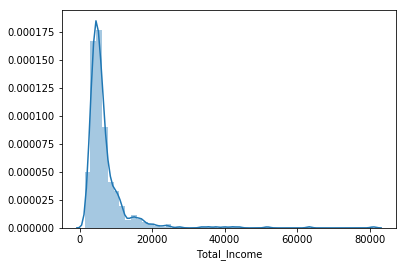

In [145]:
sns.distplot(train['Total_Income']);

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


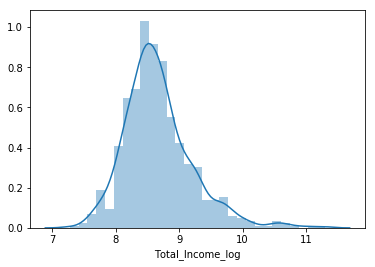

In [146]:
train['Total_Income_log'] = np.log(train['Total_Income'])
sns.distplot(train['Total_Income_log']);

In [147]:
# EMI feature
train['EMI']=(train['LoanAmount']/train['Loan_Amount_Term'])*1000

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


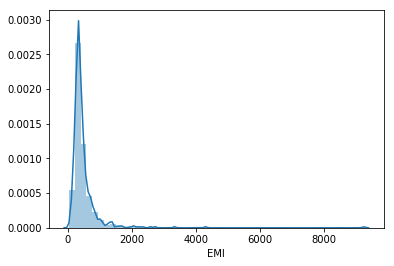

In [148]:
sns.distplot(train['EMI']);

In [149]:
# Balance Income feature
train['Balance Income']=train['Total_Income']-(train['EMI']) 

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


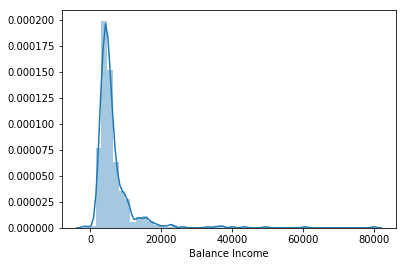

In [150]:
sns.distplot(train['Balance Income']);

### Logistic Regression after adding features 

In [153]:
train.shape

(614, 26)

In [154]:
y.shape

(614,)

### Split data into train and test data 

In [151]:
X_train, X_test, y_train, y_test = train_test_split(train,y)

In [152]:
# logistic regression   
model = LogisticRegression(random_state=1)
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [156]:
pred_test = model.predict(X_test)
score = accuracy_score(y_test,pred_test)
print('accuracy_score',score)   

accuracy_score 0.7792207792207793


## Decision Tree

In [166]:
from sklearn.tree import DecisionTreeClassifier

In [167]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [168]:
y_pred = model.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('accuracy_score',score)   

accuracy_score 0.7207792207792207


In [169]:
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[37, 22],
       [21, 74]], dtype=int64)

In [170]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.64      0.63      0.63        59
          1       0.77      0.78      0.77        95

avg / total       0.72      0.72      0.72       154



### Random Forest

In [174]:
from sklearn.ensemble import RandomForestClassifier

In [177]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [178]:
y_pred = model.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('accuracy_score',score)   

accuracy_score 0.7077922077922078


## Naive Bayes 

In [185]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import 

In [180]:
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB(priors=None)

In [181]:
y_pred = model.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('accuracy_score',score)   

accuracy_score 0.7662337662337663


In [183]:
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[30, 29],
       [ 7, 88]], dtype=int64)

In [184]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.81      0.51      0.62        59
          1       0.75      0.93      0.83        95

avg / total       0.77      0.77      0.75       154

